In [1]:
%matplotlib inline

Let's start by just taking a look at where everything is in terms of performance. If there's a clear winner, we'll look into the results in slightly greater detail. If not, we'll have to improvise.

In [3]:
def plot_results(plot, results, label, alpha=1):
    xs=[r.t1 for r in results]
    ys=[r.gflops_s() for r in results]
    plot.scatter(xs, ys, label=label, alpha=alpha)
import plot_IJD
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [20, 10]

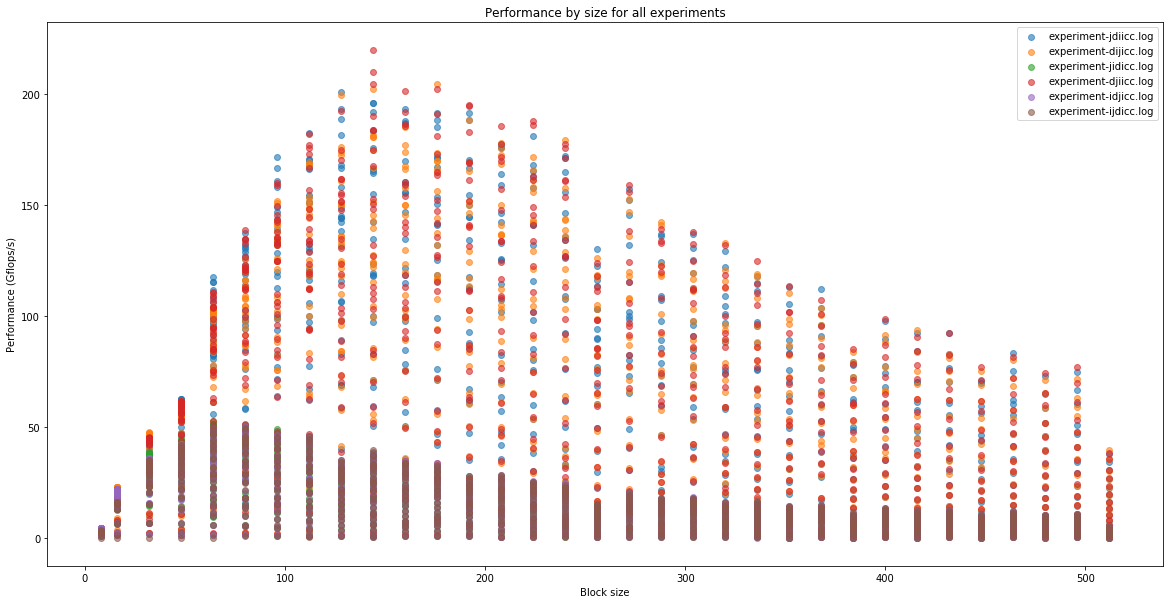

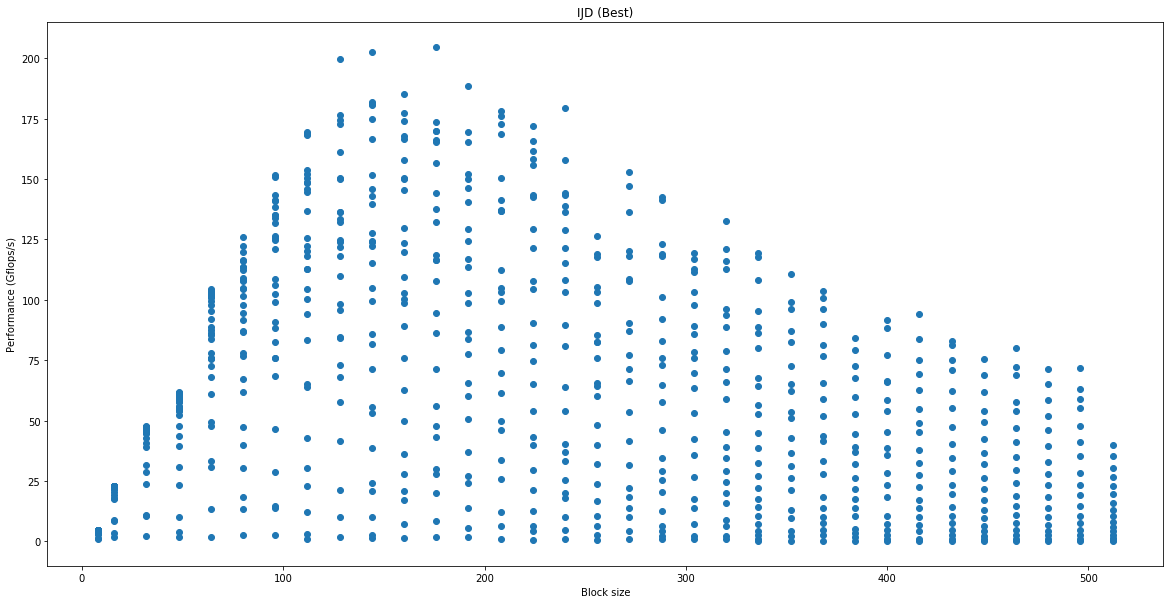

In [11]:
file_names=['experiment-'+perm+'icc.log' for perm in {'ijd', 'idj', 'jid', 'jdi', 'dij', 'dji'}]
file_results={}
for file_name in file_names:
    file_results[file_name]=plot_IJD.get_results_from_file(open(file_name, 'r'))
for f in file_results:
    file_results[f]=plot_IJD.avg_results(file_results[f])

for f in file_results:
    plot_results(plt, file_results[f], f, alpha=.6)
plt.xlabel('Block size')
plt.ylabel('Performance (Gflops/s)')
plt.title('Performance by size for all experiments')
plt.legend()
plt.show()

bestf='experiment-dijicc.log'
plot_results(plt, file_results[bestf], bestf)
plt.xlabel('Block size')
plt.ylabel('Performance (Gflops/s)')
plt.title('IJD (Best)')
plt.show()

There isn't really a clear winner, but the entries with a leading d generally seem to be better

In [14]:
bresults=file_results[bestf]
Ns={r.N * r.t1 for r in bresults}

r_Ns=[]

for N in Ns:
    r_N=[r for r in bresults if r.N*r.t1==N]
    r_Ns.append(r_N)

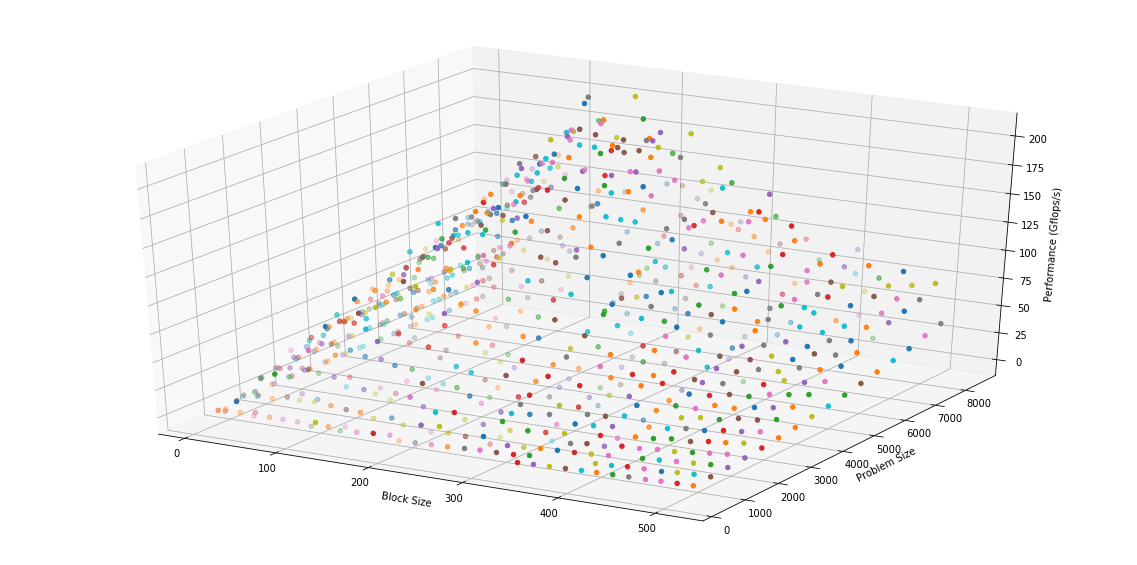

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
for r_N in r_Ns:
    xs=[r.t1 for r in r_N]
    zs=[r.gflops_s() for r in r_N]
    ys=[r.N*r.t1 for r in r_N]
    ax.scatter(xs, ys, zs, label=str(N))
ax.set_xlabel('Block Size')
ax.set_ylabel('Problem Size')
ax.set_zlabel('Performance (Gflops/s)')
plt.show()

There looks to be a pretty distinct peak at ~b=150-200, and otherwise performance steadily increases based on problem size.